# Forest Cover Type Prediction

## Project description : 
Get started on this competition with Kaggle Scripts. No data download or local environment needed!

Random forests? Cover trees? Not so fast, computer nerds. We're talking about the real thing.

In this competition you are asked to predict the forest cover type (the predominant kind of tree cover) from strictly cartographic variables (as opposed to remotely sensed data). The actual forest cover type for a given 30 x 30 meter cell was determined from US Forest Service (USFS) Region 2 Resource Information System data. Independent variables were then derived from data obtained from the US Geological Survey and USFS. The data is in raw form (not scaled) and contains binary columns of data for qualitative independent variables such as wilderness areas and soil type.

This study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. These areas represent forests with minimal human-caused disturbances, so that existing forest cover types are more a result of ecological processes rather than forest management practices.


## Ressources : 
* data origin : Bache, K. & Lichman, M. (2013). UCI Machine Learning Repository. Irvine, CA: University of California, School of Information and Computer Science

## github :
 https://github.com/ClaireGayral/formation_openclassroom/tree/master/P8_gayral_claire

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import pickle


DATA_PATH = "/home/clairegayral/Documents/openclassroom/data/P8/forest/"
RES_PATH = "/home/clairegayral/Documents/openclassroom/res/P8/"

## my .py : 
from script01_duplicates import *
from script02_missing_values_treatment import *
from script03_univariate_analysis import *
from script04_multivariate_analysis import *
from script05_CV_regression import *
from script06_reduce_dim import *

## extract list of text :
from bs4 import BeautifulSoup
import re
# from sklearn.feature_extraction.s import s# import ENGLISH_STOP_WORDS

# from sklearn import model_selection 
# from sklearn import preprocessing
# from sklearn import neighbors
# from sklearn import linear_model

# from sklearn.impute import KNNImputer
from sklearn.decomposition import NMF
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
# from sklearn.cluster import AgglomerativeClustering
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import fbeta_score
# from sklearn.metrics import make_scorer
# from sklearn.metrics import mean_squared_error
# from sklearn.metrics import fowlkes_mallows_score
# from sklearn.metrics.pairwise import pairwise_kernels


# from sklearn.preprocessing import OneHotEncoder
# from sklearn.linear_model import LogisticRegression

# from scipy.cluster.hierarchy import cut_tree
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import dendrogram


from bs4 import BeautifulSoup
import nltk
from collections import defaultdict
from nltk.stem.snowball import EnglishStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
from gensim.utils import tokenize
from gensim import corpora
from gensim import models
from gensim.models import FastText

## Plan du notebook :


Pour faciliter la lecture, il est possible de revenir à ce sommaire, en cliquant sur [back to menu](#menu) chaque fois qu'il apparaît. A partir de ce menu, il est possible de naviguer entre les parties en cliquant sur leur titre.


<a id ="menu"></a>
1. [Exploration of data : ](#section1)
    1. [Outputs - the soils](#section1.1)
    2. [Preprocessing sur les titres/corpus](#section1.2)
    
2. [Création de la variable de sortie - les tags](#section2)
    1. [Projection des tags](#section2.1)
    2. [Regroupement des tags](#section2.2)
    3. [Construction d'une variable retour y](#section2.3)
    
3. [Traitements sur le text](#section3)
    1. [Preprocessing sur les tokens](#section1.2)
        2. [Tokenization](#section3.1.1)
        3. [Stopwords](#section3.1.2)
        4. [Lemmatization](#section3.1.3)   
    2. [Représentation des mots](#section3.2)
          1. [Bag of Words](#section3.2.1)
          2. [tf-idf](#section3.2.2)
          3. [Word to vect](#section3.2.3)       
          4. [Représentation en nuage de mots](#section3.2.4)
<!--     3. [Réduction de dimension](#section3.3) -->



# 1. Exploration of data : 

In [2]:
df_train = pd.read_csv(DATA_PATH+"/train.csv", index_col=0)
print("train data shape : ", df_train.shape)
df_train.head()

train data shape :  (15120, 55)


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Id,,,,,,,,,,,,,,,,,,,,,
1,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
2,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
3,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
4,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
5,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [3]:
df_test = pd.read_csv(DATA_PATH+"/test.csv", index_col=0)
print("train data shape : ", df_test.shape)
df_test.head()

train data shape :  (565892, 54)


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
Id,,,,,,,,,,,,,,,,,,,,,
15121,2680,354,14,0,0,2684,196,214,156,6645,...,0,0,0,0,0,0,0,0,0,0
15122,2683,0,13,0,0,2654,201,216,152,6675,...,0,0,0,0,0,0,0,0,0,0
15123,2713,16,15,0,0,2980,206,208,137,6344,...,0,0,0,0,0,0,0,0,0,0
15124,2709,24,17,0,0,2950,208,201,125,6374,...,0,0,0,0,0,0,0,0,0,0
15125,2706,29,19,0,0,2920,210,195,115,6404,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_test.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

A first reading of the data allows to separate the input variables from the output variables : 

In [64]:
X = df_train.loc[:,[col for col in df_train.columns if col != "Cover_Type"]]
y = df_train.loc[:,"Cover_Type"]

<a id ="section1.1"></a>
<!-- <a id ="menu"></a> -->

[back to menu](#menu)
## 1.A Input data : 
Let's begin with input data. I first split categorical and numerical data to analyse them. In the [project data description](https://www.kaggle.com/c/forest-cover-type-prediction/data) every column is well defined.

### Categorical data : 

In [63]:
soil_vars = ['Soil_Type' +str(k) for k in range(1,41)]
area_vars = ['Wilderness_Area' +str(k) for k in range(1,5)]

soil_cat = X.loc[:,soil_vars].idxmax(axis=1)
area_cat = X.loc[:,area_vars].idxmax(axis=1)

A quick check of the categorical variables shows that the classes are well separated (we are not in multi-label classification)

In [68]:
tmp = X.loc[:, soil_vars].sum(axis=1).value_counts()
print("Percentage of one-classe soil : ",
      np.round((tmp[tmp.index == 1]/X.shape[0]).values[0] * 100,1),
      "%")

tmp = X.loc[:, area_vars].sum(axis=1).value_counts()
print("Percentage of one-classe area : ",
      np.round((tmp[tmp.index == 1]/X.shape[0]).values[0] * 100,1),
      "%")

Percentage of one-classe soil :  100.0 %
Percentage of one-classe area :  100.0 %


In [41]:
## Idea : use description of soil to gather ? (text-mining)
from caterogical_vars_description import *

In [74]:
soil_cat

Id
1        Soil_Type29
2        Soil_Type29
3        Soil_Type12
4        Soil_Type30
5        Soil_Type29
            ...     
15116     Soil_Type4
15117     Soil_Type4
15118     Soil_Type4
15119     Soil_Type4
15120     Soil_Type2
Length: 15120, dtype: object

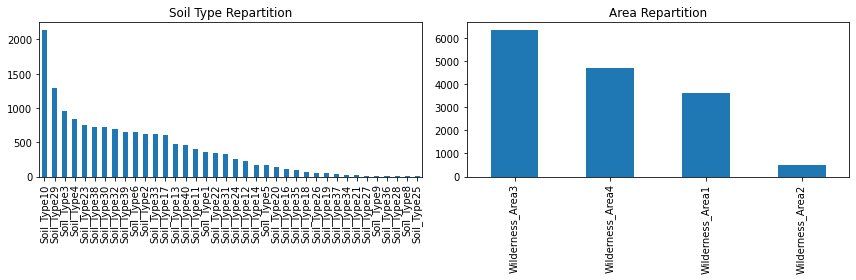

In [111]:
X_cat = pd.concat((soil_cat,area_cat), axis=1)
X_cat = X_cat.rename({0:"soil_type", 1: "area"}, axis=1)
# fig, (ax1,ax2) = plt.subplots(1,2,
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
# sns.countplot(x = "soil_type", data = X_cat, sort)
X_cat["soil_type"].value_counts().plot(kind= "bar")
plt.title("Soil Type Repartition")
plt.xticks(rotation=90)
plt.subplot(1,2,2)
X_cat["area"].value_counts().plot(kind= "bar")
# sns.countplot(x = "area", data = X_cat)
plt.title("Area Repartition")
# plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

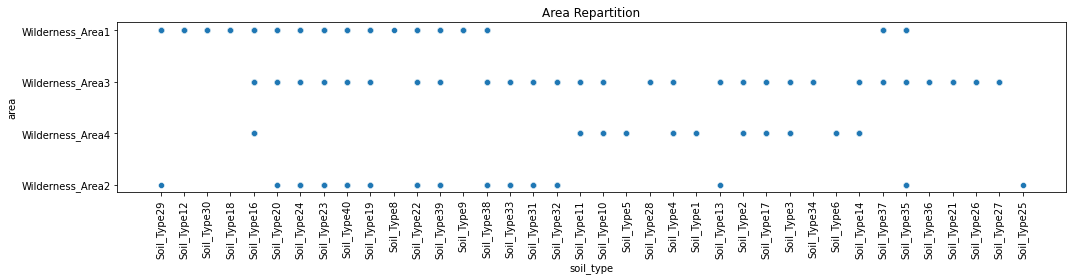

In [124]:
plt.figure(figsize=(15,4))
sns.scatterplot(x = "soil_type",y = "area", data = X_cat)
plt.title("Area Repartition")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

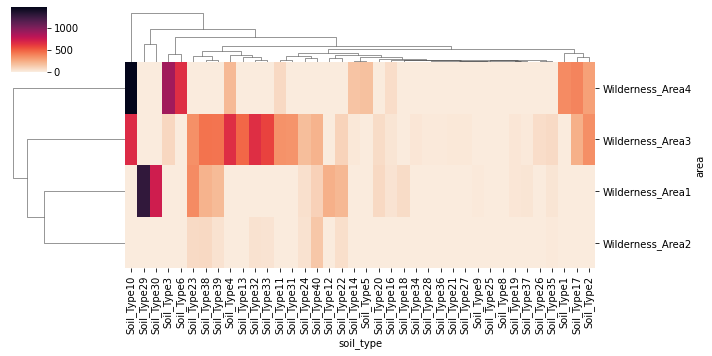

In [150]:
sns.clustermap(pd.crosstab(X_cat["area"], X_cat["soil_type"]),
               figsize=(10, 5), cmap=sns.color_palette("rocket_r", as_cmap=True) )
plt.show()

In [88]:
cat_vars = soil_vars + area_vars

### Numerical data 

In [58]:
num_data = X.loc[:,[col for col in X.columns if col not in cat_vars]]

Id
1        Soil_Type29
2        Soil_Type29
3        Soil_Type12
4        Soil_Type30
5        Soil_Type29
            ...     
15116     Soil_Type4
15117     Soil_Type4
15118     Soil_Type4
15119     Soil_Type4
15120     Soil_Type2
Length: 15120, dtype: object

In [61]:
num_data.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
count,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,1511.147288
std,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,1099.936493
min,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000
25%,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,730.000000
50%,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,1256.000000
75%,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,1988.250000
max,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,6993.000000
